<a href="https://colab.research.google.com/github/justdelly/My-IE423-Tasks/blob/main/notebooks/IE423_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IE423 FINAL EXAM

ÖMER BUĞRA GÖRGÜNOĞLU

## <font color='#475468'> Online Shoppers Purchasing Intention:</font>
### <font color='#475468'> Predict whether a visitor to an online shopping website will make a purchase based on various features of their visit </font>

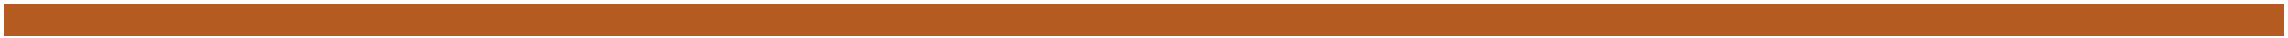

## Initialize

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
dfHrt = pd.read_csv('/content/drive/MyDrive/Datasets/online_shoppers_intention.csv')

In [13]:
dfHrt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# 1. Exploratory Data Analysis (EDA):

## About the Dataset


In [14]:
# Checking the shape of the DataFrame
print(dfHrt.shape)


(12330, 18)


Our dataset has 12330 rows for each user and has 17 different features informing us. One target variable in terms of this notebook.


Let's look at the features.


- **Administrative**: The amount of pages the visitor visited about the management of the account.

- **Administrative_Duration**: Total time spent on pages related to the management of the account.

- **Informational**: The amount of pages the visitor visited about the information related to website,communication and transactions of the account.

- **Informational_Duration**: Total time spent on pages related to website, communication,
and transaction information of the account.

- **ProductRelated**: The amount of pages the visitor visited about the product-related information.

- **ProductRelated_Duration**: Total time spent on pages that contains product-related information.

- **BounceRates**: The rate of visitors that enter the site and then leave without making any other requests.

- **ExitRates**: The rate of pageviews on the site which were the last in the session

- **PageValues**: The mean value for a web page which is visited by a user before finalizing a transaction

- **SpecialDay**: Closeness of the visiting time to a special day. (i.e. Valentine's Day, Mother's Day)

- **Month**: Month of the year

- **OperatingSystems**: Operating system of the visitor.

- **Browser**: Browser of the visitor

- **Region**: Geographical region of the visitor

- **TrafficType**: Traffic source type

- **VisitorType** : New or Returning visitor

- **Weekend** : Boolean value indicating whether the visit is made on a weekend or not.






- **Revenue** : True if the visitor made a purchase, false otherwise. Which is also out target variable.






## Distribution Of Variables

We specify the columns 'OperatingSystems', 'Browser', 'Region', 'TrafficType' since they have a numeric value but they are categorical.

Numerical columns: Index(['Administrative', 'Administrative_Duration', 'BounceRates', 'ExitRates',
       'Informational', 'Informational_Duration', 'PageValues',
       'ProductRelated', 'ProductRelated_Duration', 'SpecialDay'],
      dtype='object')
Categorical columns: Index(['Browser', 'Month', 'OperatingSystems', 'Region', 'TrafficType',
       'VisitorType'],
      dtype='object')


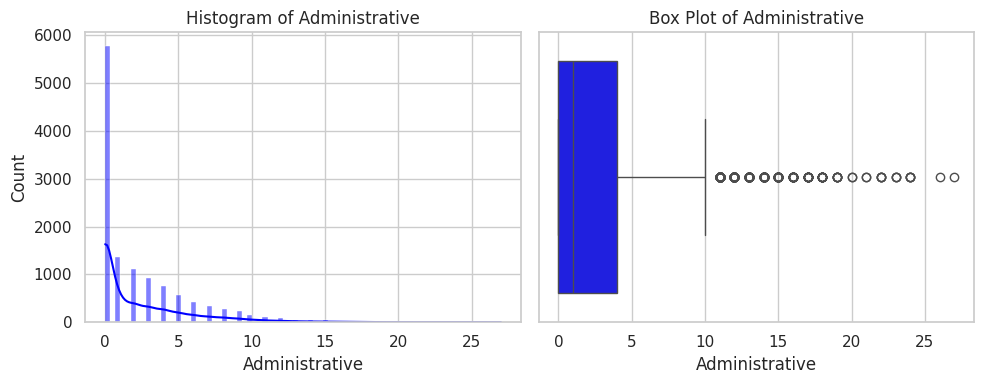

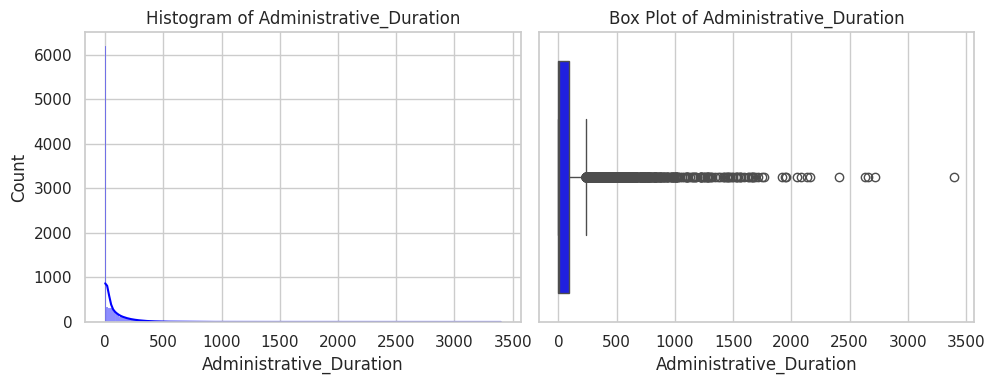

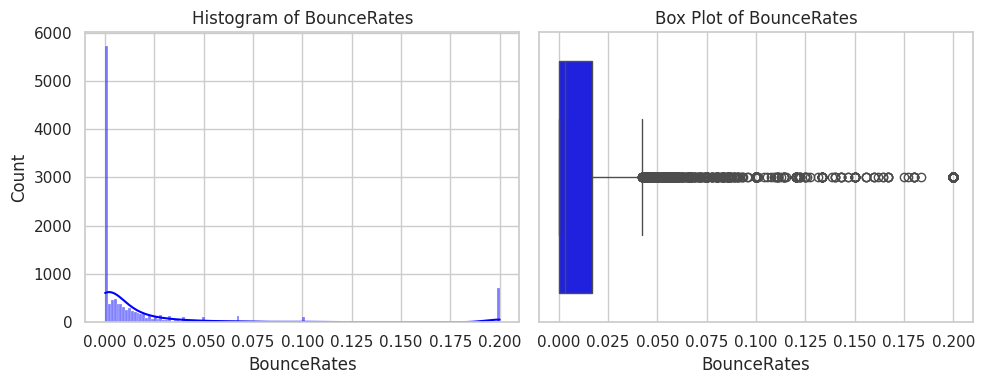

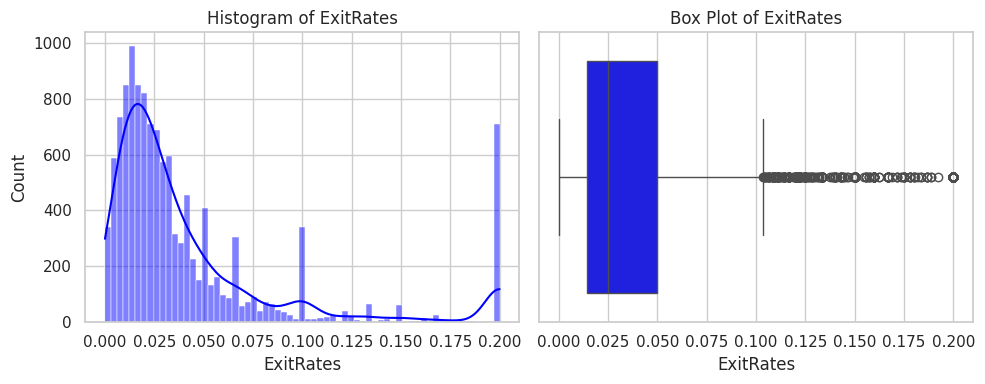

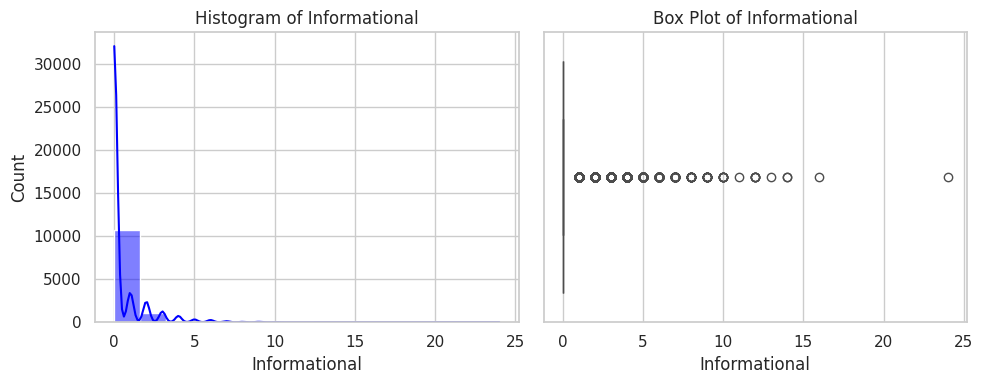

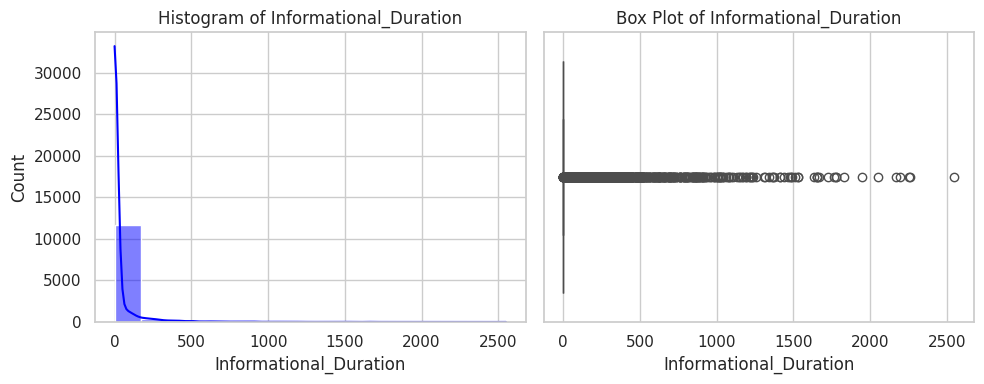

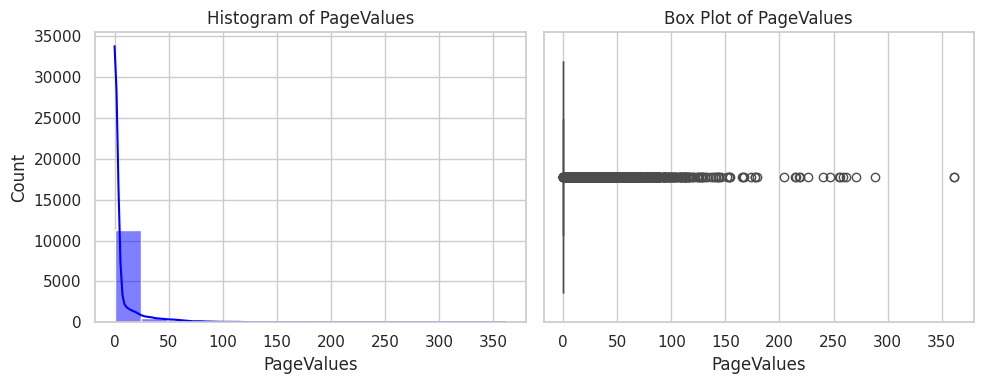

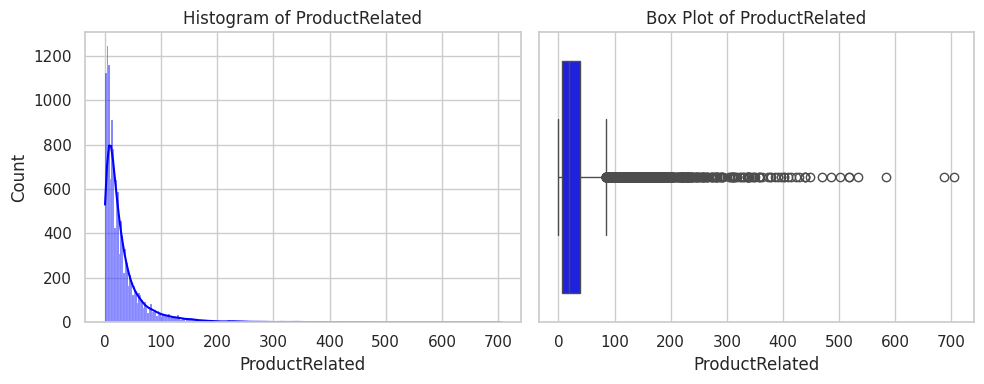

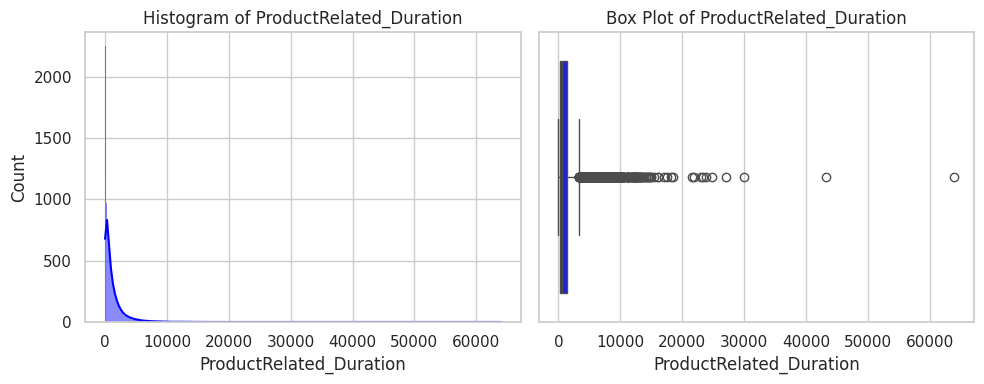

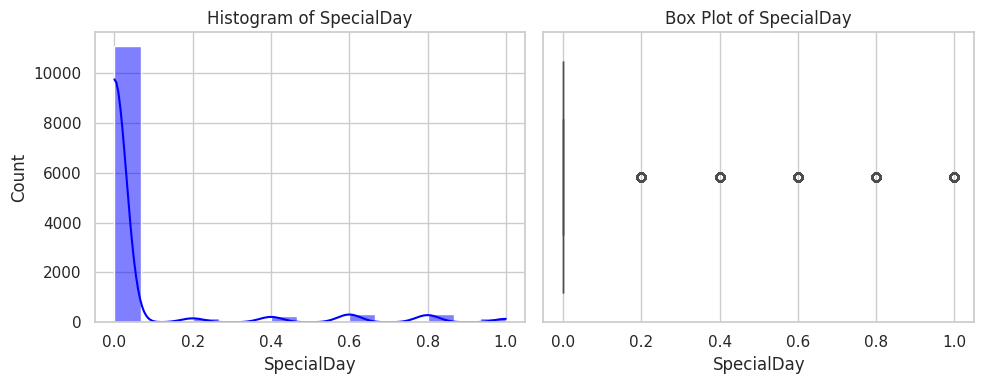

<ipython-input-15-36d076f25bbd>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dfHrt[col], palette='viridis')


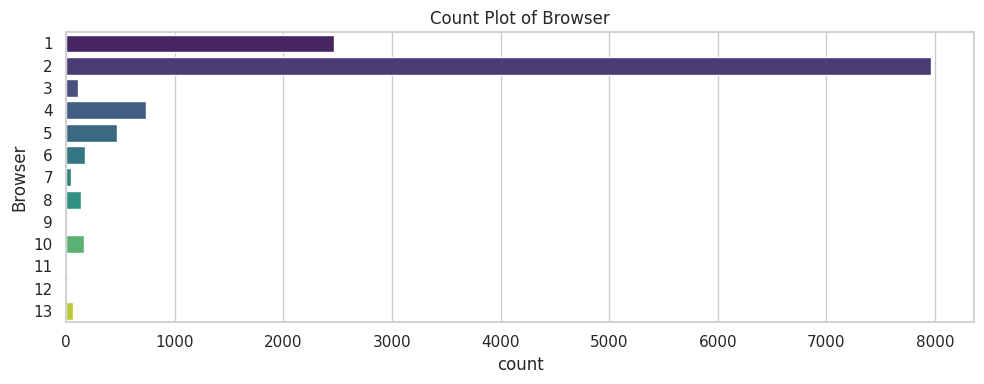

<ipython-input-15-36d076f25bbd>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dfHrt[col], palette='viridis')


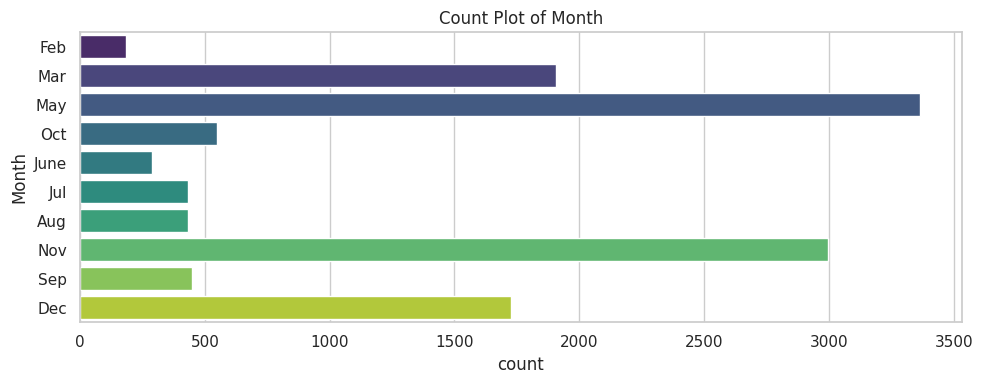

<ipython-input-15-36d076f25bbd>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dfHrt[col], palette='viridis')


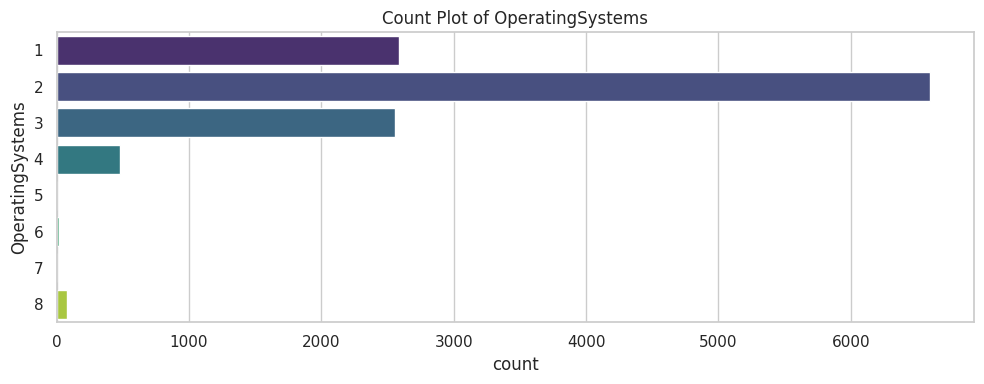

<ipython-input-15-36d076f25bbd>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dfHrt[col], palette='viridis')


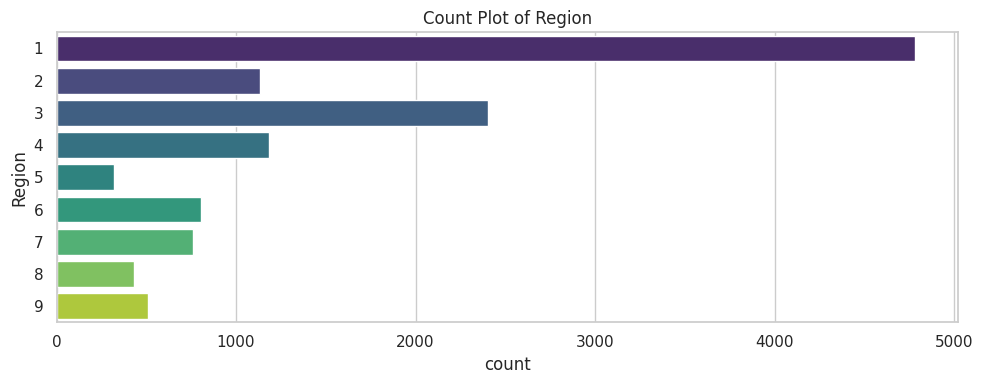

<ipython-input-15-36d076f25bbd>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dfHrt[col], palette='viridis')


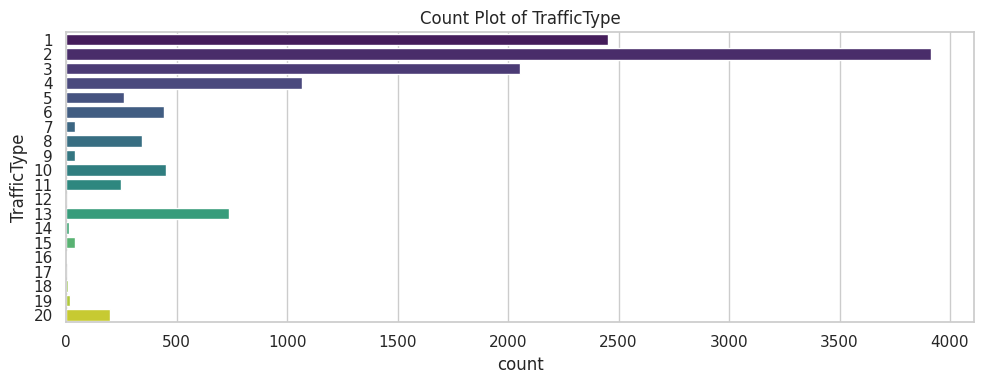

<ipython-input-15-36d076f25bbd>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dfHrt[col], palette='viridis')


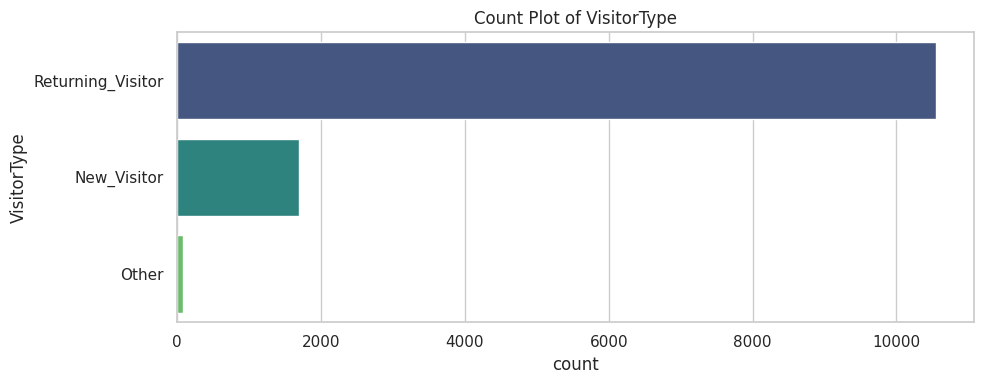

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plots
sns.set(style="whitegrid")

# Numerical columns (excluding the specified columns)
numerical_cols = dfHrt.select_dtypes(include=['float64', 'int64']).columns.difference(['OperatingSystems', 'Browser', 'Region', 'TrafficType'])

# Categorical columns (including the specified columns)
categorical_cols = dfHrt.select_dtypes(include=['object', 'category']).columns.union(['OperatingSystems', 'Browser', 'Region', 'TrafficType'])

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

# Plotting numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(dfHrt[col], kde=True, color='blue')
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=dfHrt[col], color='blue')
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

# Plotting categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 4))

    sns.countplot(y=dfHrt[col], palette='viridis')
    plt.title(f'Count Plot of {col}')

    plt.tight_layout()
    plt.show()


From the distibution of the features we can state:
- Very big part of people do not visit the pages about account management, as a result the most frequent duration value is 0
- What we stated up can be also said for distribution of Informational and Informational_Duration features
- Again from BounceRates it can be said that very big part of people leave the site without triggering any other requests
- For SpecialDay seasonality can be seen.
- Almost all of the people enter site from 2 types of browsers.
- On months March, May, November and December we see an increase.
- Two regions come forward amongst others.
- A lot of the visitors are returning visitors

In [16]:
print(numerical_cols)


Index(['Administrative', 'Administrative_Duration', 'BounceRates', 'ExitRates',
       'Informational', 'Informational_Duration', 'PageValues',
       'ProductRelated', 'ProductRelated_Duration', 'SpecialDay'],
      dtype='object')


In [17]:
print(categorical_cols)

Index(['Browser', 'Month', 'OperatingSystems', 'Region', 'TrafficType',
       'VisitorType'],
      dtype='object')


## Correlation Between Variables

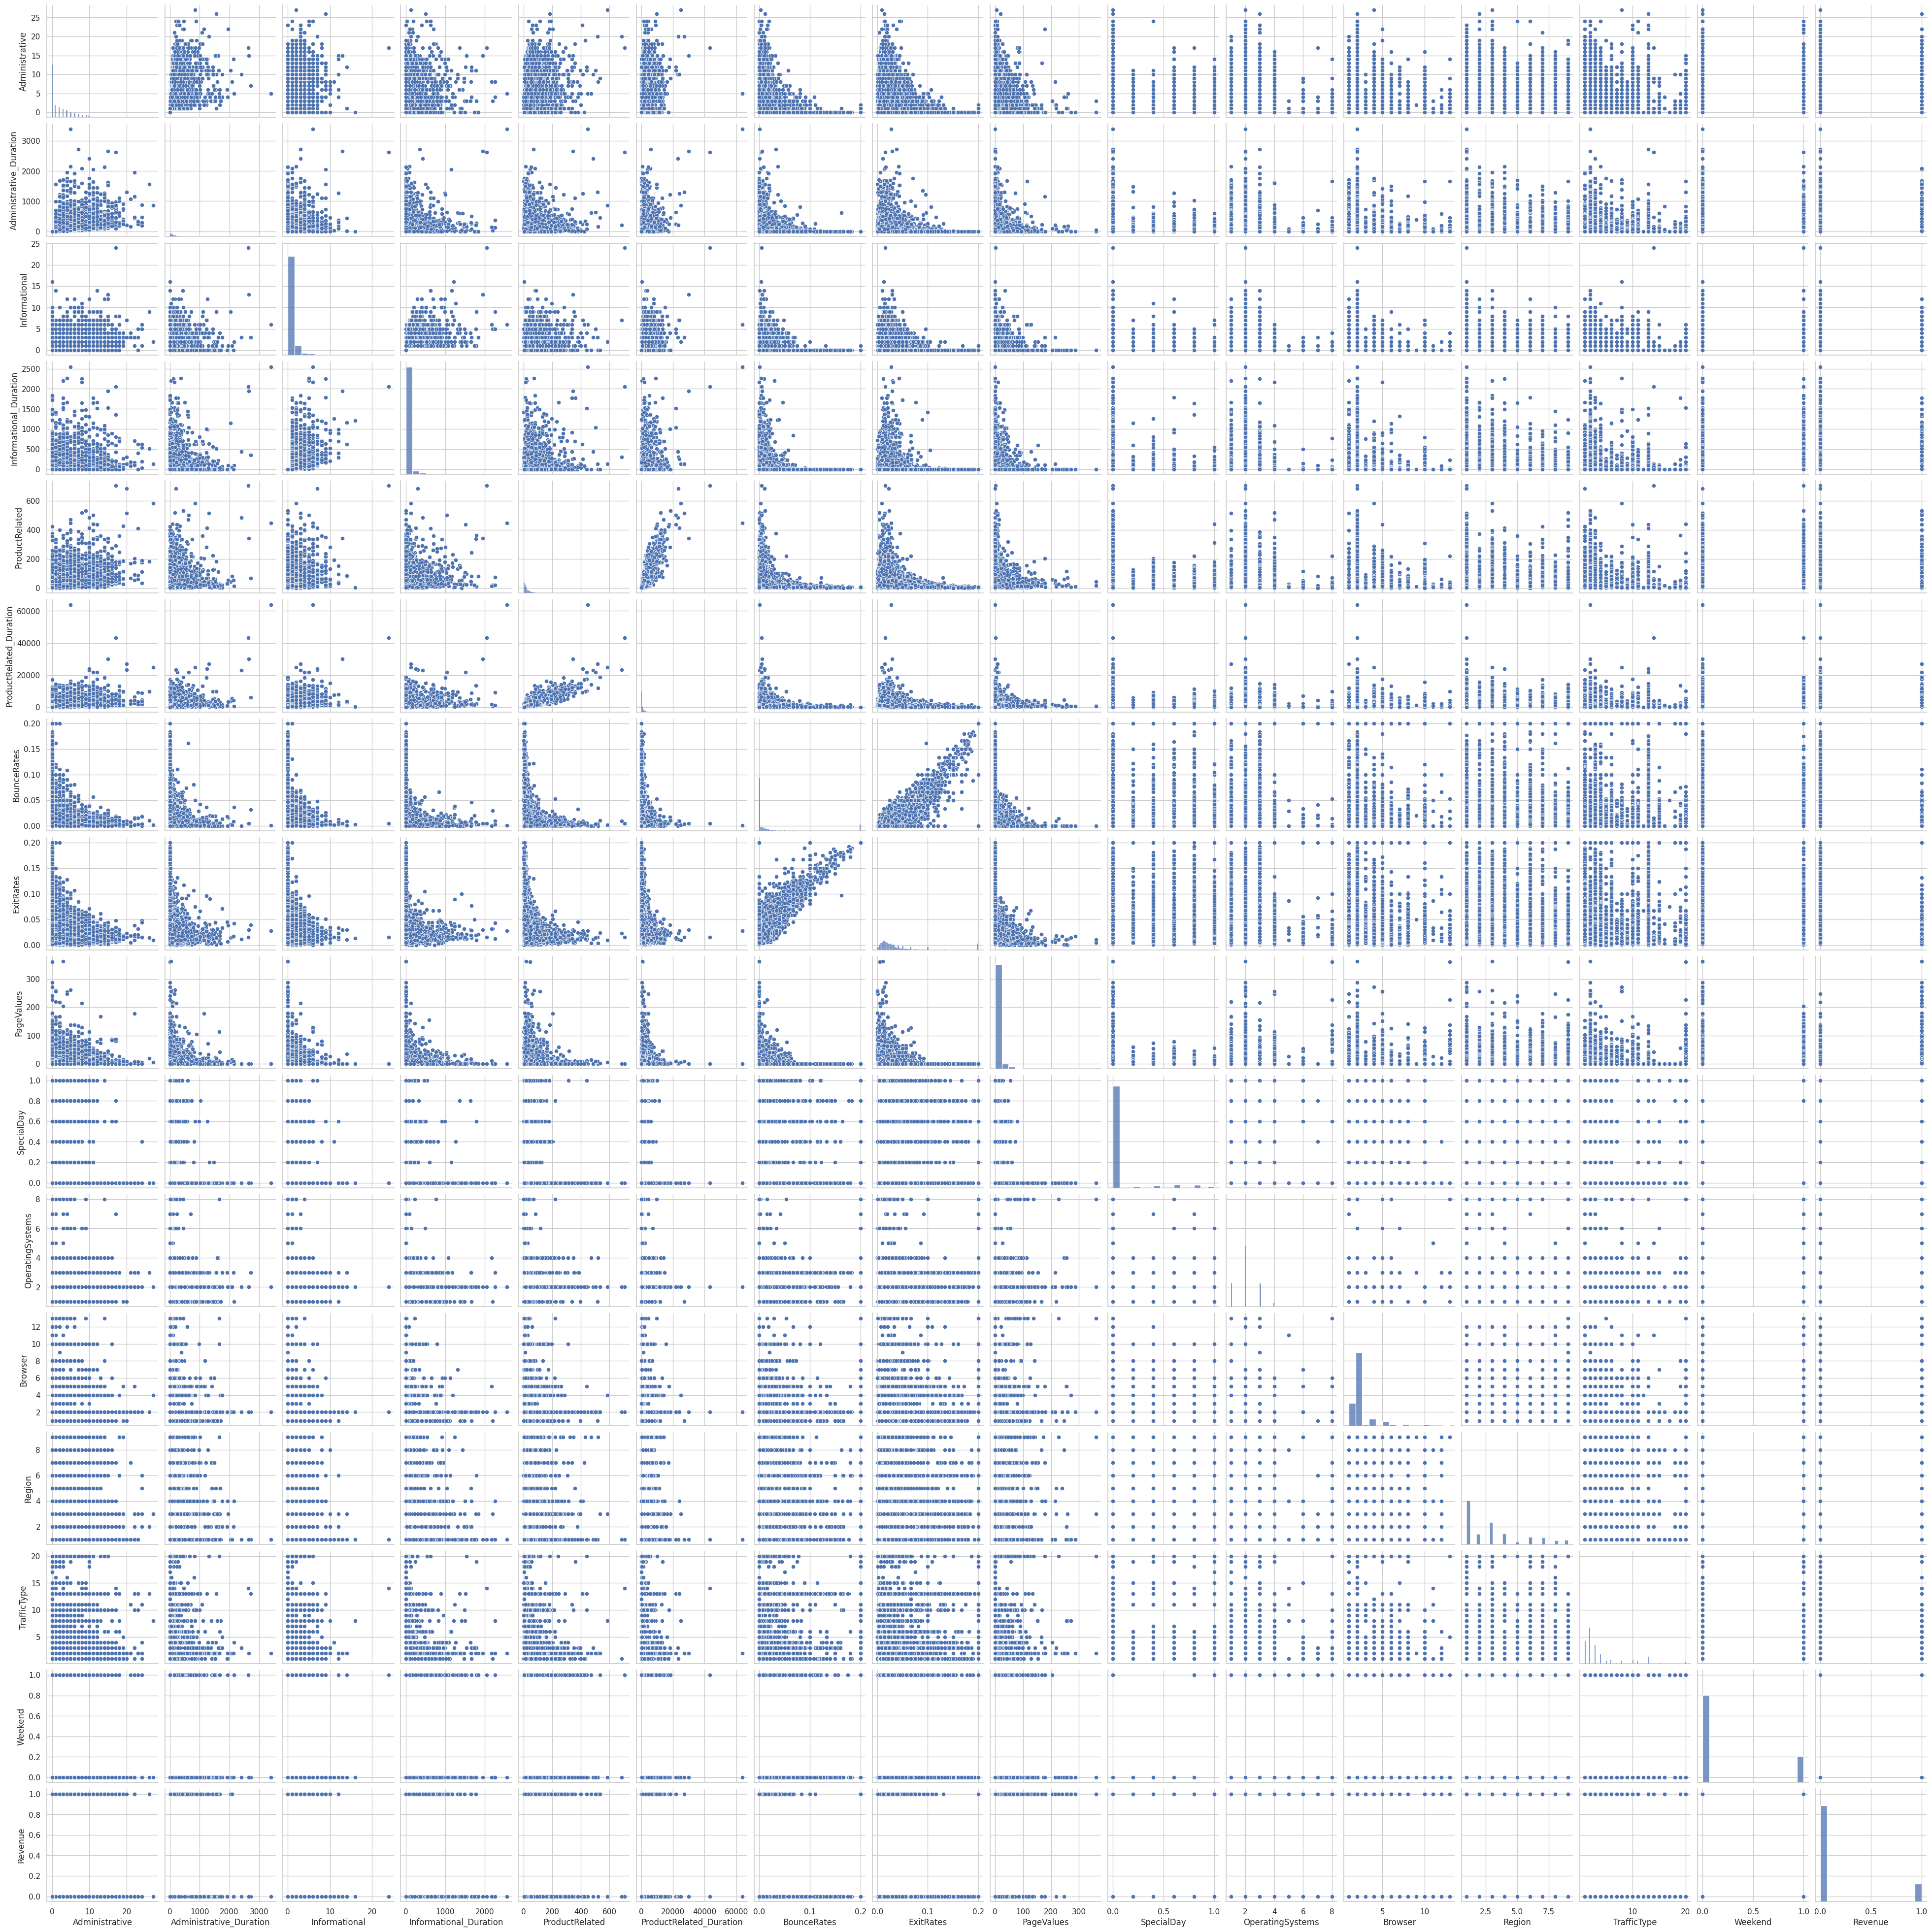

In [18]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfHrt)

# 2. Data Preprocessing

## Handling Missing Values

In [19]:
# Check for missing values
print(dfHrt.isnull().sum())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


There are no missing values in datasset, we don't have to deal with them

  ## Encoding Categorical Variables

In [20]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode each categorical column
for col in categorical_cols:
  dfHrt[col] = encoder.fit_transform(dfHrt[col])

dfHrt.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,0,0,0,0,2,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,1,1,0,1,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,3,0,8,2,2,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,1,1,3,2,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,2,2,0,3,2,True,False


## Standardization Of Numerical Features

In [21]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical features
dfHrt[numerical_cols] = scaler.fit_transform(dfHrt[numerical_cols])

dfHrt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,0,0,0,0,2,False,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,2,1,1,0,1,2,False,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2,3,0,8,2,2,False,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,2,2,1,1,3,2,False,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,2,2,2,0,3,2,True,False


# 3. Feature Engineering

We add the extra columns:

**Total Page Views**: Sum of the pages visited in different categories.

**Total Duration**: Total time spent on the site.

**Average Page Duration**: Average time spent per page



In [22]:
# Total Page Views
dfHrt['Total_Page_Views'] = dfHrt['Administrative'] + dfHrt['Informational'] + dfHrt['ProductRelated']

# Total Duration
dfHrt['Total_Duration'] = dfHrt['Administrative_Duration'] + dfHrt['Informational_Duration'] + dfHrt['ProductRelated_Duration']

# Average Page Duration
dfHrt['Avg_Page_Duration'] = dfHrt['Total_Duration'] / dfHrt['Total_Page_Views']

dfHrt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Page_Views,Total_Duration,Avg_Page_Duration
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,0,0,0,0,2,False,False,-1.784474,-1.326469,0.743339
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,1,1,0,1,2,False,False,-1.761989,-1.293024,0.733844
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,3,0,8,2,2,False,False,-1.784474,-1.326469,0.743339
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,2,1,1,3,2,False,False,-1.761989,-1.325076,0.752034
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,2,2,0,3,2,True,False,-1.582107,-0.998552,0.631153


Evaluating the feature importances and creating the X and y variables.

In [23]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming dfHrt is your DataFrame and 'Revenue' is your target variable
X = dfHrt.drop(columns=['Revenue'])
y = dfHrt['Revenue']

# Train a RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


                    Feature  Importance
8                PageValues    0.353989
7                 ExitRates    0.074690
5   ProductRelated_Duration    0.066609
18           Total_Duration    0.060099
17         Total_Page_Views    0.057402
4            ProductRelated    0.053807
19        Avg_Page_Duration    0.052474
6               BounceRates    0.044564
1   Administrative_Duration    0.041322
10                    Month    0.037957
0            Administrative    0.029229
14              TrafficType    0.024792
13                   Region    0.023245
3    Informational_Duration    0.019337
12                  Browser    0.015126
11         OperatingSystems    0.014134
2             Informational    0.011173
15              VisitorType    0.009295
16                  Weekend    0.007926
9                SpecialDay    0.002831


PageValues is the most correlated feature with the Revenue

Correlation Matrix

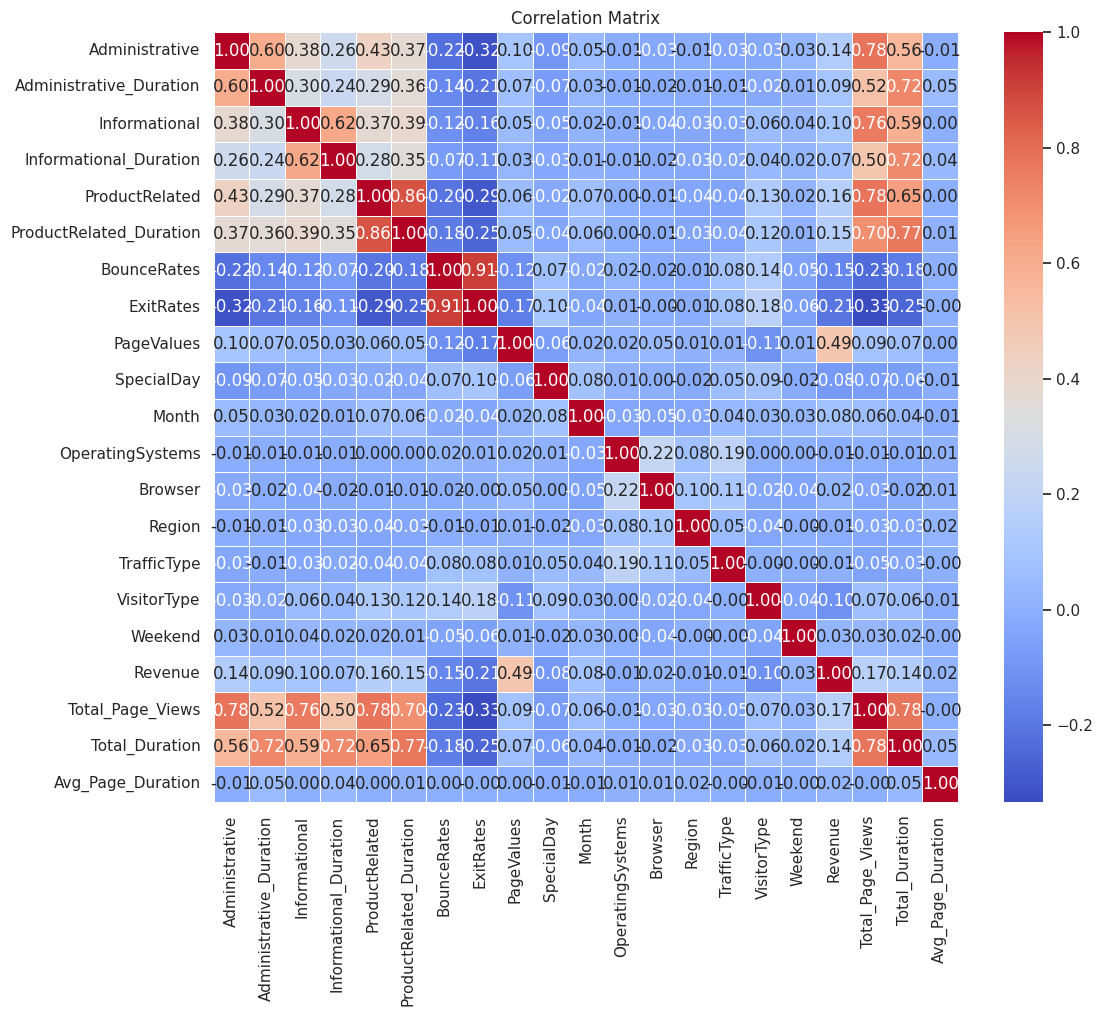

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = dfHrt.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# 4. Model Building

## Splitting the data into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training Models

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import numpy as np
import pandas as pd

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Set probability=True for ROC-AUC
    'Naive Bayes': GaussianNB(),
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss'),  # Specify eval_metric for XGBoost
    'KNN': KNeighborsClassifier()  # Added KNN classifier
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
    else:
        y_prob = np.zeros_like(y_test)  # For models without predict_proba

    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob) if len(np.unique(y_test)) > 1 else np.nan  # Check if there is more than one class
    }

    results[name] = metrics

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.869019   0.726804  0.343066  0.466116  0.878289
Decision Tree        0.845093   0.535802  0.527981  0.531863  0.718248
Random Forest        0.893755   0.754266  0.537713  0.627841  0.921810
SVM                  0.872263   0.744898  0.355231  0.481054  0.838139
Naive Bayes          0.807380   0.446309  0.647202  0.528302  0.817151
XGBoost              0.890511   0.709199  0.581509  0.639037  0.917102
KNN                  0.859692   0.668394  0.313869  0.427152  0.777780


- Based on the provided scores, the **Random Forest** model demonstrates the best overall performance

- While **Logistic Regression** shows a high ROC AUC score (indicating good discrimination between classes), its lower recall and F1 score suggest it might be less effective at identifying positive instances.

- **Decision Tree** has decent accuracy but fall behind in other metrics compared to Random Forest.

To further improve that model we can do hyperparameter tuning.

# 5. Model Optimization

## Hyperparameter Tuning

**Decision Tree**

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best parameters and model testing
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
metrics_dt = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1 Score': f1_score(y_test, y_pred_dt),
    'ROC AUC': roc_auc_score(y_test, y_prob_dt)
}

print("Decision Tree metrics:", metrics_dt)


Decision Tree metrics: {'Accuracy': 0.875506893755069, 'Precision': 0.6390374331550802, 'Recall': 0.5815085158150851, 'F1 Score': 0.6089171974522293, 'ROC AUC': 0.8604667270499227}



**Decision Tree metrics (Before and After):**

**'Accuracy'**: 0.8536 > 0.8755

**'Precision'**: 0.5625 > 0.6413

'**Recall'**: 0.5474 > 0.5742

**'F1 Score'**: 0.5548 > 0.6059

**'ROC AUC'**: 0.7311 > 0.8464

## Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score

# Choose a model (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the average score
average_score = cv_scores.mean()
print("Average cross-validation score:", average_score)


Cross-validation scores: [0.92254663 0.90348743 0.89334955 0.8783455  0.8864558 ]
Average cross-validation score: 0.8968369829683699


The average score of 0.8968 indicates that, on average, the model correctly predicts the outcome (purchase or no purchase) around 89.68% of the time.

# 6. Insights and Conclusion

**Actionable Insights**

- The time visiters spends on pages should be tried to be increased since we see as customer spends more time on page he/she have more tendency to complete transactions.

- We can make advertisements to most used browser types in order to be more effective.

- We see seasonality in special days but so little this can be targeted

- Again we can make adevertisement on 2 regions to get more engagement


**Limitations and Potential Improvements**

- Some models may have been influenced by the potential imbalance in the dataset, and using resampling methods to balance the classes could be beneficial for them.

- 3 categories for the pages might not give us enough patterns, maybe we can divide those categories to sub-categories and then predict.